# **Used cars price prediction**
## Final project

### *Dependencies and dataset*

In [89]:
#the dependencies for working with dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [90]:
#the dataset I am going to work with
dataset_cars=pd.read_csv('car data.csv')

### *Information about dataset*

There is the dataset of cars. I need to obtain information about it for further manipulations.

In [91]:
dataset_cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [92]:
#getting the shape of dataset(rows and columns)
dataset_cars.shape

(301, 9)

In [93]:
#getting the information about types of:
#fuel, seller, transmission, and owner.
print(dataset_cars['Fuel_Type'].unique())
print(dataset_cars['Seller_Type'].unique())
print(dataset_cars['Transmission'].unique())
print(dataset_cars['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [94]:
#checking the absence or presence of null values
dataset_cars.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [95]:
dataset_cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Now, information about dataset:

*   It has 301 rows and 9 columns
*   There are no null values. All data is present :)
*   Types of fuels: petrol, diesel, CNG
*   Types of sellers: dealer, individual
*   Types of transmissions: manual, automatic
*   Number of owners(how many people owned the car): 0, 1, 3


---


Some interesting numbers of dataset:
*   The extremum of the year are 2003 and 2008
*   The extremum of selling price are 0.1 and 35
*   The extremum of present price are 0.31 and 92.6
*   The extremum of kilometers driven are 500 and 500000
*   The extremum of owners are 0 and 3



### *Manipulations with dataset*





I am implementing some manipulations with dataset below.

In [96]:
#I need to declare new dataset for obtaining needed information
final_dataset_cars=dataset_cars[
    ['Car_Name',
     'Year',
     'Selling_Price',
     'Present_Price',
     'Kms_Driven',
     'Fuel_Type',
     'Seller_Type',
     'Transmission',
     'Owner']]

In [97]:
#checking first 5 rows of the new dataset
final_dataset_cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [98]:
#adding new column about current year
final_dataset_cars['Current_Year'] = 2023

In [99]:
#checking first 5 rows of the new dataset after adding current year
final_dataset_cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


In [100]:
#adding new column about "age" of the car
final_dataset_cars['Age'] = final_dataset_cars['Current_Year']- final_dataset_cars['Year']

In [101]:
#checking first 5 rows of the new dataset after adding age of the car
final_dataset_cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [102]:
#getting rid of the Current Year column because i don't need it already
final_dataset_cars=final_dataset_cars.drop(['Current_Year'],axis=1)

In [103]:
#checking first 5 rows...
final_dataset_cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [104]:
#finding the pairwise correlation of all columns
final_dataset_cars.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Age
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104,-1.000000
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000,0.182104
Age,-1.000000,-0.236141,0.047584,0.524342,0.182104,1.000000


I encode some categorical data below, because numbers are more understandable than words

In [105]:
#encoding "Fuel_Type" column
final_dataset_cars.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#"Seller_Type"
final_dataset_cars.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#"Transmission"
final_dataset_cars.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [106]:
#checking first 5 rows...
final_dataset_cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,0,0,0,0,9
1,sx4,2013,4.75,9.54,43000,1,0,0,0,10
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,6
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,12
4,swift,2014,4.60,6.87,42450,1,0,0,0,9


###*Model training and evaluation. Vizualization*

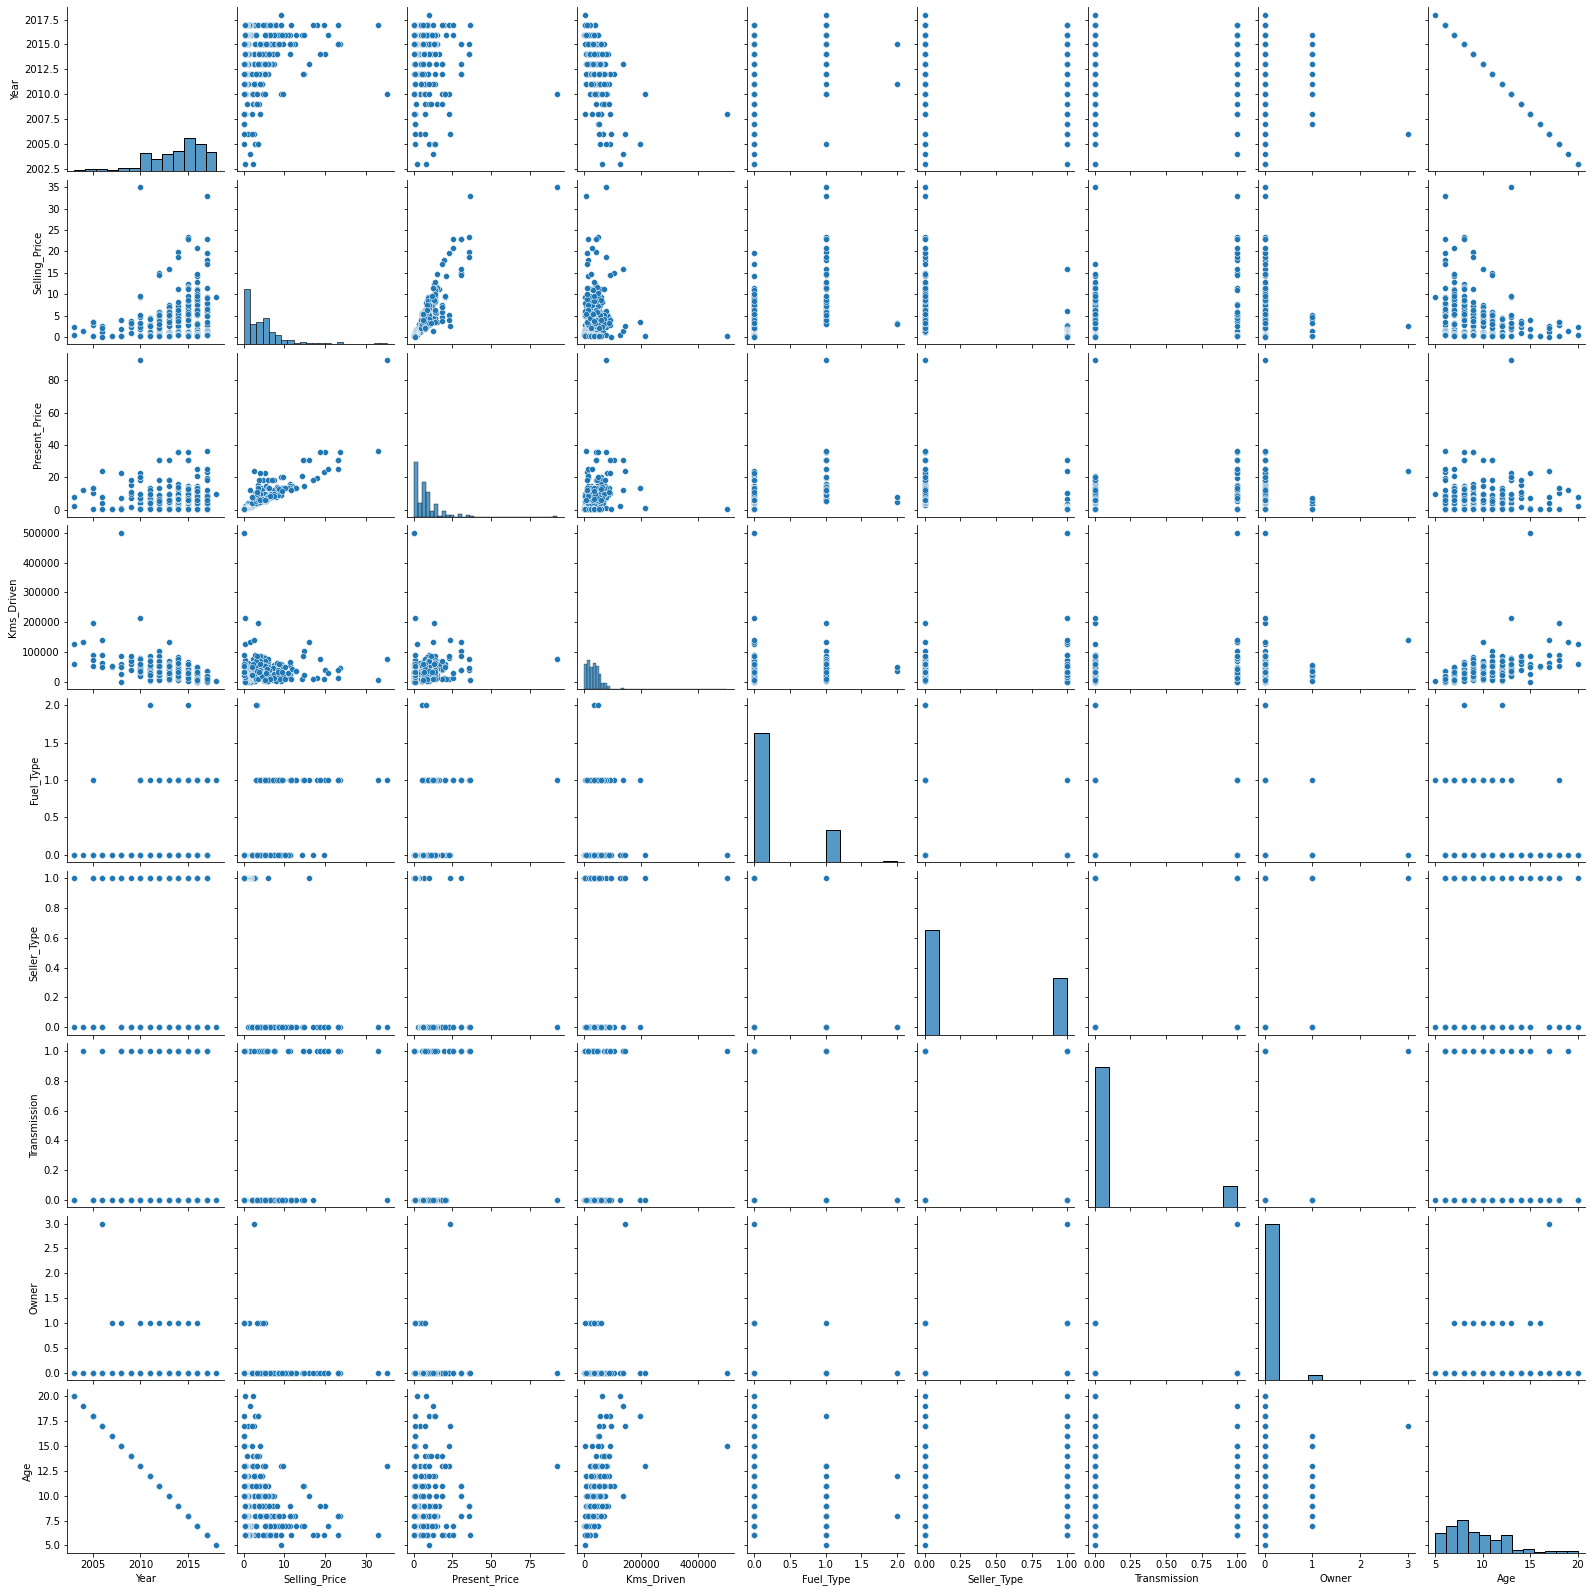

In [107]:
sns.pairplot(final_dataset_cars)

In [108]:
#splitting
X = final_dataset_cars.drop(['Car_Name','Selling_Price'],axis=1)
Y = final_dataset_cars['Selling_Price']

In [109]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,5.59,27000,0,0,0,0,9
1,2013,9.54,43000,1,0,0,0,10
2,2017,9.85,6900,0,0,0,0,6
3,2011,4.15,5200,0,0,0,0,12
4,2014,6.87,42450,1,0,0,0,9
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0,7
297,2015,5.90,60000,0,0,0,0,8
298,2009,11.00,87934,0,0,0,0,14
299,2017,12.50,9000,1,0,0,0,6


In [110]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Lasso Regression is used for model training. It is an extension of linear regression that adds a regularization penalty to the loss function during training

In [112]:
#loading lasso regression
lasso_reg = Lasso()

In [113]:
lasso_reg.fit(X_train,Y_train)

Lasso()

In [114]:
#prediction on Training data
training_data_prediction = lasso_reg.predict(X_train)

In [115]:
#R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427865885661434


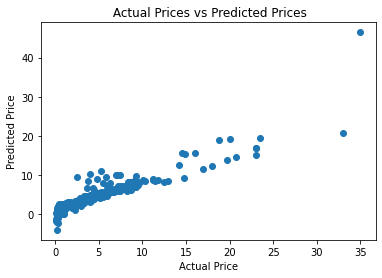

In [116]:
#visualization of the actual and predicted prices of training data
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [117]:
#prediction on Testing data
test_data_prediction = lasso_reg.predict(X_test)

In [118]:
#R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709151375567289


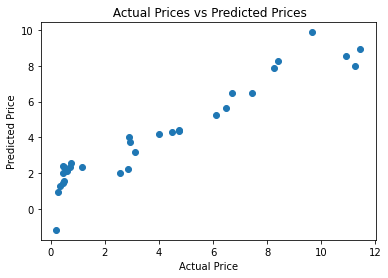

In [119]:
#visualization of the actual and predicted prices of testing data
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()